데이터 준비

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2024-07-08 11:04:44--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-07-08 11:04:44--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-07-08 11:04:44--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
print(fruits_2d.shape)

(300, 10000)


모델 훈련

In [6]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0)
km.fit(fruits_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [7]:
print(km.labels_) # 아직 사과가 0, 1, 2 중 뭔지 모름

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [8]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


첫 번째 클러스터

In [11]:
import matplotlib.pyplot as plt

In [12]:
def draw_fruits(arr, ratio=1):
  n = len(arr) # n : 샘플 개수
  rows = int(np.ceil(n/10)) # 한 줄에 10개의 이미지 그리기 -> 행 개수 계산 가능
  cols = n if rows < 2 else 10 # 행이 1개면 열 개수 == 샘플 개수
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze = False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n: # n개까지 그림
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
        axs[i, j].axis('off')
  plt.show()

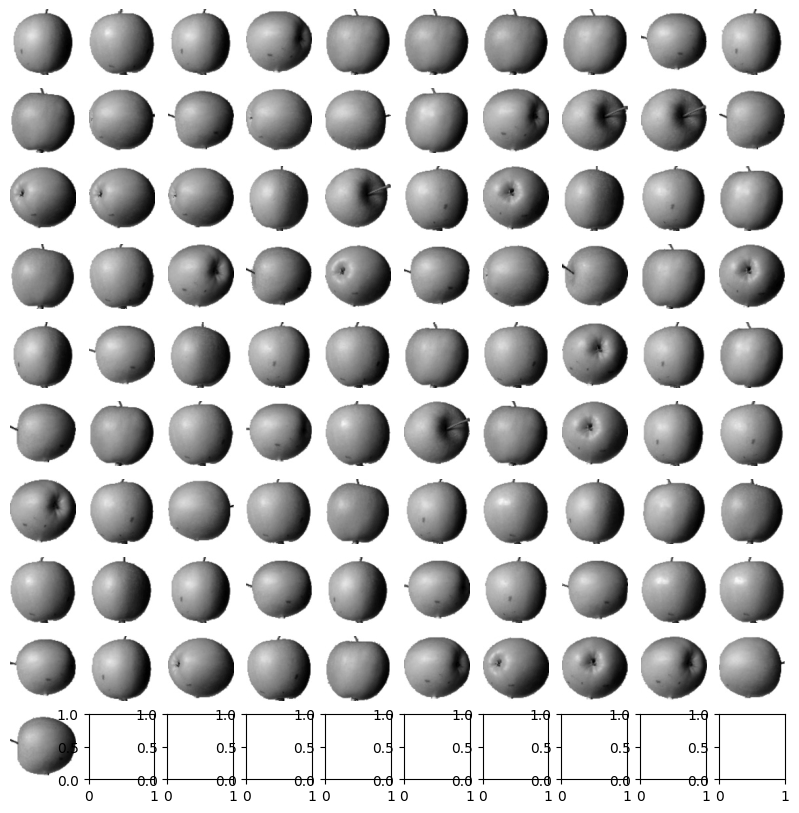

In [13]:
draw_fruits(fruits[km.labels_ == 0])

두 번째 클러스터

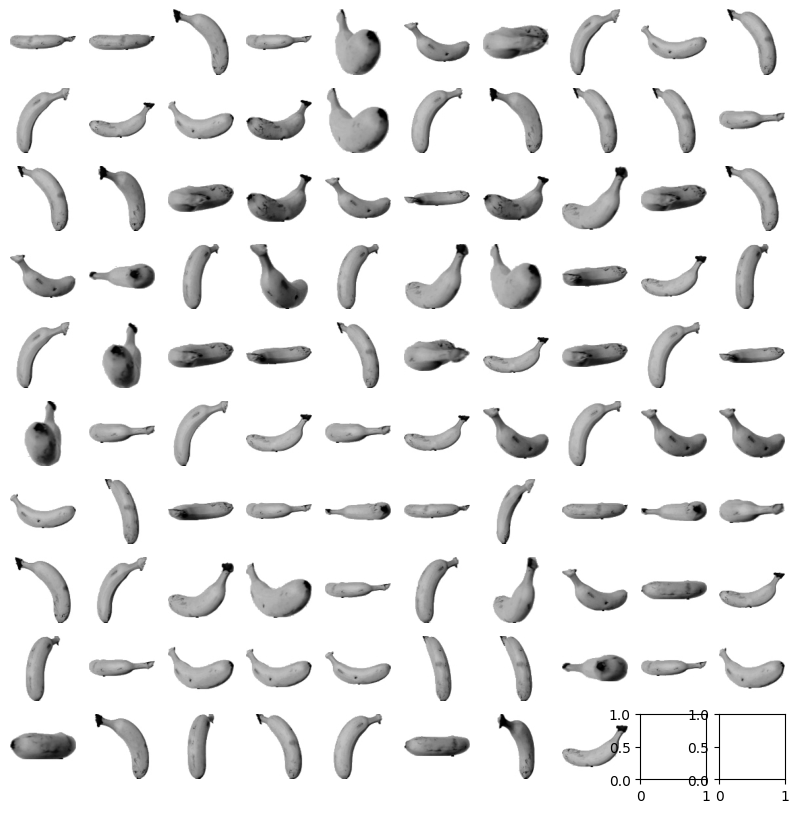

In [15]:
draw_fruits(fruits[km.labels_ == 1])

세 번째 클러스터

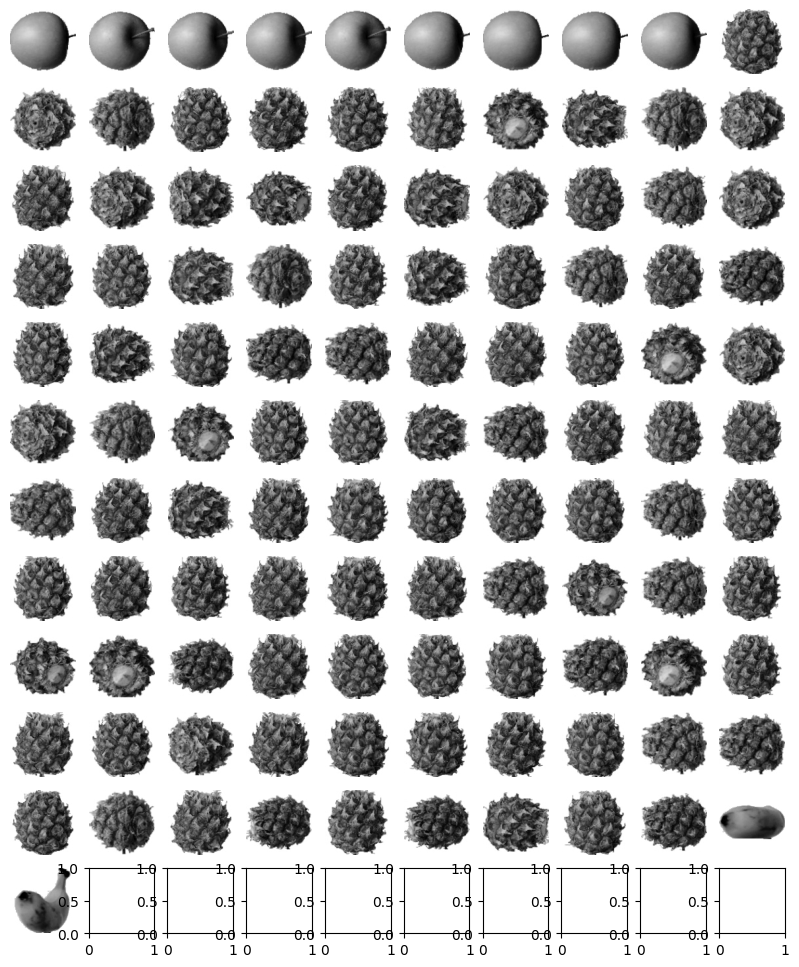

In [14]:
draw_fruits(fruits[km.labels_ == 2])

클러스터 중심

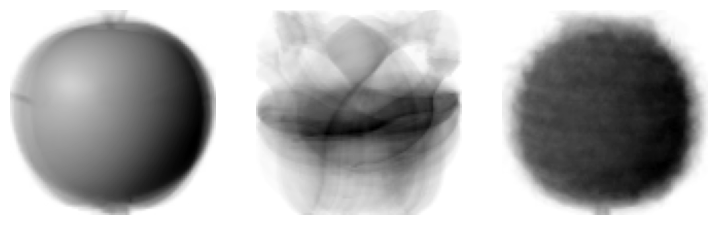

In [16]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [17]:
print(km.transform(fruits_2d[100:101]))

[[5267.70439881 8837.37750892 3393.8136117 ]]


In [18]:
print(km.predict(fruits_2d[100:101]))

[2]


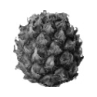

In [19]:
draw_fruits(fruits[100:101])

In [20]:
print(km.n_iter_)

4


최적의 K 찾기

In [21]:
intertias = []
for k in range(2, 7):
  km = KMeans(n_clusters=k, random_state=0)
  km.fit(fruits_2d)
  intertias.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

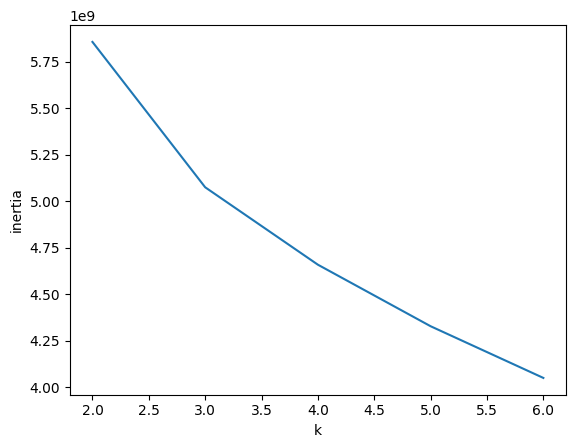

In [22]:
plt.plot(range(2, 7), intertias)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()